# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
X = pd.read_csv('~/Desktop/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
377677,10.575942,57.731303,2.784482
272474,9.638730,57.301489,4.471924
341553,8.923912,57.038541,3.829726
82770,8.839187,56.779897,21.547875
74902,9.544737,56.980292,20.400420


In [3]:
min_samples = np.arange(1,11,1)
epsilons = np.arange(0.05, 0.51, 0.01)


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.37278213,  2.25134786, -1.05101111],
       [-0.12822529,  0.76460049, -0.96005257],
       [-1.27305513, -0.14495103, -0.99466909],
       ...,
       [-1.76349576, -0.09839319,  0.51740483],
       [ 0.50187902,  0.88696212,  0.34185741],
       [ 0.3801444 , -1.06830141,  0.33453349]])

In [5]:
N = 7
XX = X.copy()
km = KMeans(n_clusters=N, random_state=1)
X['cluster'] = km.fit_predict(X[['lon', 'lat', 'alt']])

In [6]:
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])

/var/folders/7h/csh63nwx4m92q80m3txjgngr0000gn/T/ipykernel_6522/1990501922.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])


In [7]:
#Silhouette Coefficients
all_scores = np.zeros((len(min_samples), len(epsilons)))

In [8]:
for i, min_samples in enumerate(min_samples):
    for j, eps in enumerate(epsilons):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(XX[['lat', 'lon', 'alt']])
        if len(np.unique(clusters)) > 1:
           silhouette_avg = silhouette_score(XX[['lat', 'lon', 'alt']], clusters)
           all_scores[i, j] = silhouette_avg
        else:
            all_scores[i, j] = np.nan  

#Plot
plt.figure(figsize=(10, 6))
for i, min_samples in enumerate(min_samples):
    plt.plot(epsilons, all_scores[i, :], label=f'min_samples = {min_samples}')

plt.title('Road DBSCAN')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

TypeError: 'numpy.int64' object is not iterable

<Figure size 1000x600 with 0 Axes>

In [ ]:
# plot the results
plt.figure()
for i, min_sample in enumerate(min_samples):
    plt.plot(epsilons, all_scores[i, :], label=f'{min_sample}')

plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.legend(title = 'Min Samples', fontsize = 'x-small')
plt.title('Epsilon vs. Silhouette Coefficient for Multiple Min Sample Values')
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import metrics

tornado = pd.read_csv('~/Desktop/us_tornado.csv')
tornado.head

<bound method NDFrame.head of          yr  mo  dy        date  st  mag  inj  fat     slat     slon     elat  \
0      1950   1   3  1950-01-03  IL    3    3    0  39.1000 -89.3000  39.1200   
1      1950   1   3  1950-01-03  MO    3    3    0  38.7700 -90.2200  38.8300   
2      1950   1   3  1950-01-03  OH    1    1    0  40.8800 -84.5800   0.0000   
3      1950   1  13  1950-01-13  AR    3    1    1  34.4000 -94.3700   0.0000   
4      1950   1  25  1950-01-25  IL    2    0    0  41.1700 -87.3300   0.0000   
...     ...  ..  ..         ...  ..  ...  ...  ...      ...      ...      ...   
67553  2021  12  30  2021-12-30  GA    1    0    0  31.1703 -83.3804  31.1805   
67554  2021  12  30  2021-12-30  GA    1    0    0  31.6900 -82.7300  31.7439   
67555  2021  12  31  2021-12-31  AL    1    0    0  34.2875 -85.7878  34.2998   
67556  2021  12  31  2021-12-31  GA    1    0    0  33.7372 -84.9998  33.7625   
67557  2021  12  31  2021-12-31  GA    1    6    0  33.5676 -83.9877  33.5842  

In [ ]:
tornado = tornado.drop(['Country'], axis=1)
tornado = tornado.drop(tornado.index[0])
tornado.head()

In [11]:
tornado.dropna(inplace=True)

In [12]:
centers = [[1, 1], [-1, -1], [1, -1]]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
k_range = range(2, 11)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, labels))

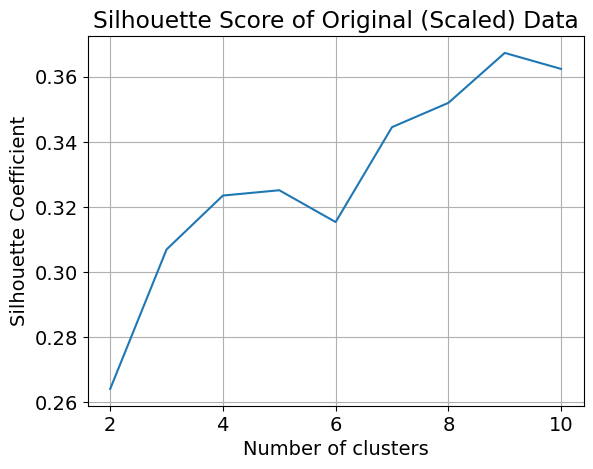

In [15]:
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Score of Original (Scaled) Data')
plt.grid(True)
plt.show()

In [19]:
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

In [20]:
scores2 = []
for k in k_range:
    km2 = KMeans(n_clusters=k, random_state=1)
    labels2 = km2.fit_predict(X)
    scores2.append(metrics.silhouette_score(X, labels2))

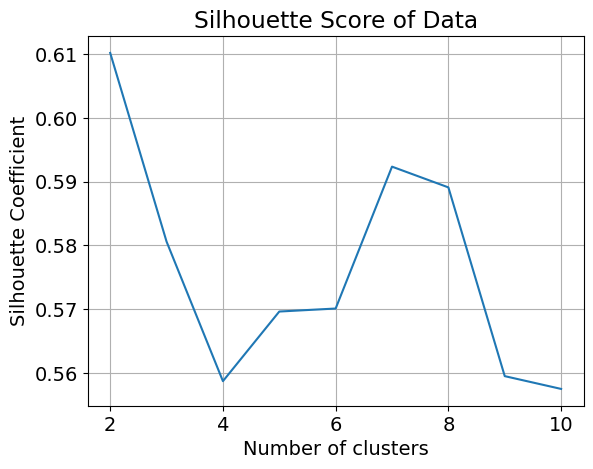

In [23]:
plt.figure()
plt.plot(k_range, scores2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Score of Data')
plt.grid(True)
plt.show()

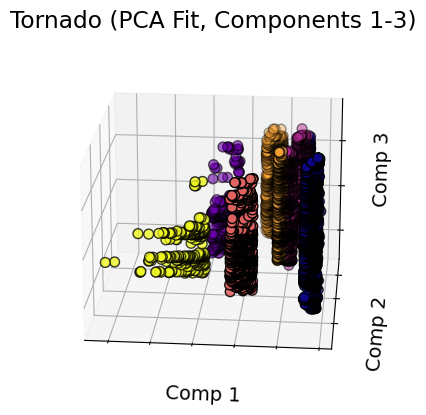

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=20, azim=95)

kmeans = KMeans(n_clusters=6, n_init=10, random_state=1)
cluster_labels = kmeans.fit_predict(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels, cmap='plasma', edgecolor='k', s=50)
ax.set_title(f'Tornado (PCA Fit, Components 1-3)')
ax.set_xlabel('Comp 1')
ax.set_ylabel('Comp 2')
ax.set_zlabel('Comp 3')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

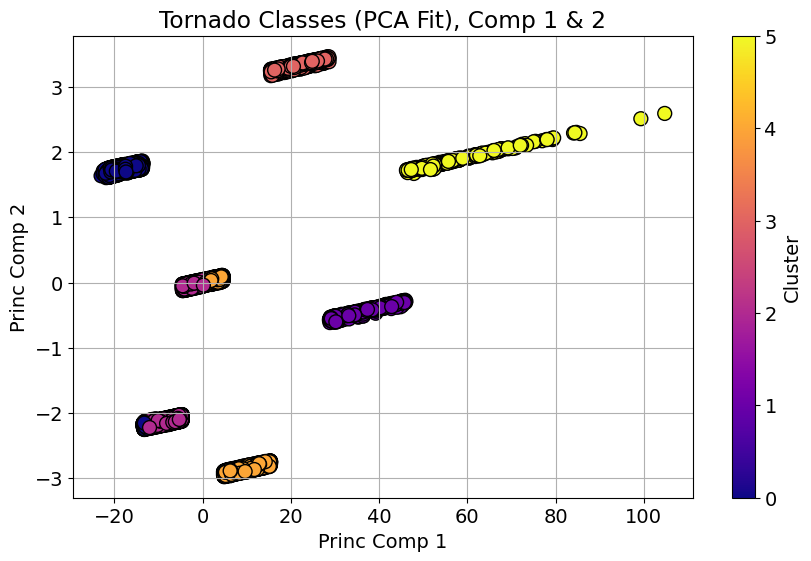

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='plasma', edgecolor='k', s=100)
plt.title(f'Tornado Classes (PCA Fit), Comp 1 & 2')
plt.xlabel('Princ Comp 1')
plt.ylabel('Princ Comp 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()